## Business Understanding

The Information on residential property prices in India. Housing Price Dataset providies insights into factors influencing property prices across different regions in India.
> **Objective** :

* The goal is to build a binary classifier that predicts whether a house's price is above or below a specific threshold.

> **Success Criteria :**

* Improve decision-making for pricing strategies, better understand factors influencing house prices, and provide a robust predictive model for stakeholders.

## Data Understanding

This Dataset is ideal for real estate market analysis and predictive modeling.

The CSV file has 23 columns and 14619 rows.

> The following columns are :

* id
* Date
* number of bedrooms
* number of bathrooms
* living area
* lot area
* number of floors
* waterfront present
* number of views
* condition of the house
* grade of the house
* Area of the house(excluding basement)
* Area of the basement
* Built Year
* Renovation Year
* Postal Code
* Lattitude
* Longitude
* living_area_renov
* lot_area_renov
* Number of schools nearby
* Distance from the airport
* Price

## Business Problem

**Initial Questions**
 * What is the pairwise correlation of all `columns` in dataframe ?
 * What is the average price associated with each `bedroom count`?
 * What is the `Age of the Houses` ?
 * What is the relationship between `Total Area` vs `Price`?


## Data Preparation

In [4]:
#from google.colab import drive
#drive.mount('/content/drive')

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from imblearn.over_sampling import SMOTE

# load dataset
file_path= r"D:\Machine_Learning_Project\Housing_Price\data\house_price.csv"
data=pd.read_csv(file_path)

# display the first few rows of the data
print(data.head())

print("\nThe Total rows and columns are: ",data.shape)

           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0                       5  ...    

#### Summary of data

In [6]:

data.info()

print("Statistical detail of dataset")
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


#### Null Values

In [7]:
# Checking for missing value

missing_value = data.isnull().sum()
print(missing_value) # no null values


id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

### Exploratory Data Analysis

#### Descriptive Data Analysis

In [8]:
# summary statictis
print(data.describe())

                 id          Date  number of bedrooms  number of bathrooms  \
count  1.461900e+04  14619.000000        14619.000000         14619.000000   
mean   6.762821e+09  42604.546412            3.379233             2.129557   
std    6.237162e+03     67.343747            0.938655             0.769955   
min    6.762810e+09  42491.000000            1.000000             0.500000   
25%    6.762815e+09  42546.000000            3.000000             1.750000   
50%    6.762821e+09  42600.000000            3.000000             2.250000   
75%    6.762826e+09  42662.000000            4.000000             2.500000   
max    6.762832e+09  42734.000000           33.000000             8.000000   

        living area      lot area  number of floors  waterfront present  \
count  14619.000000  1.461900e+04      14619.000000        14619.000000   
mean    2098.156851  1.509369e+04          1.502326            0.007661   
std      928.218740  3.792089e+04          0.540241            0.087196 

#### Categorical & Numerical Features

In [9]:
# Handle categorical variable
# Categoircal feature are variable in dataset that represent categories or group of


categorical_features = ['waterfront present', 'condition of the house', 'grade of the house', 'Postal Code']

# Scale numberical feautures
numerical_features = ['number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
                      'number of floors', 'number of views', 'Area of the house(excluding basement)',
                      'Area of the basement', 'Built Year', 'Renovation Year', 'Lattitude', 'Longitude',
                      'living_area_renov','lot_area_renov', 'Number of schools nearby', 'Distance from the airport']



#### What is the pairwise correlation of all columns in dataframe ?

In [10]:
#pairwise correlation of all columns in dataframe
temp_numerical_features = numerical_features + ['Price']

correlation_matrix = data[temp_numerical_features].corr()

price_correlation= correlation_matrix['Price'].sort_values(ascending=False)
print(price_correlation)

print("\nLiving Area has positive correlation, indicating that larger living area houses tend to be more expensive")

Price                                    1.000000
living area                              0.712276
Area of the house(excluding basement)    0.615179
living_area_renov                        0.585021
number of bathrooms                      0.532031
number of views                          0.394954
Area of the basement                     0.330499
number of bedrooms                       0.308165
Lattitude                                0.297570
number of floors                         0.262649
Renovation Year                          0.133362
lot area                                 0.082117
lot_area_renov                           0.075697
Built Year                               0.050936
Longitude                                0.024807
Number of schools nearby                 0.009904
Distance from the airport                0.004074
Name: Price, dtype: float64

Living Area has positive correlation, indicating that larger living area houses tend to be more expensive


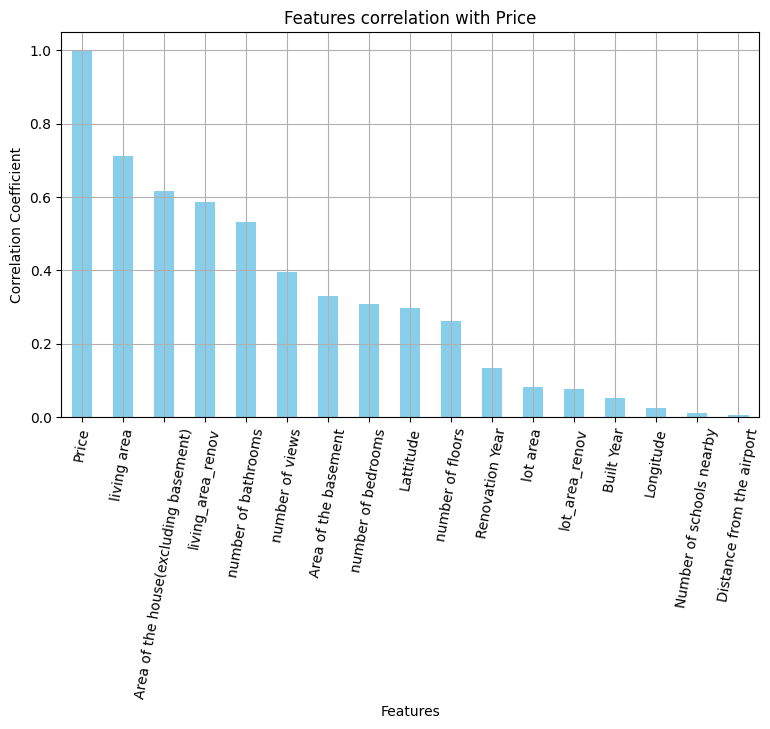

In [11]:
plt.figure(figsize=(9,5))
price_correlation.plot(kind= 'bar', color = 'skyblue')
plt.title("Features correlation with Price")
plt.xlabel("Features")
plt.ylabel("Correlation Coefficient")
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

 #### What is the average price associated with each bedroom count?

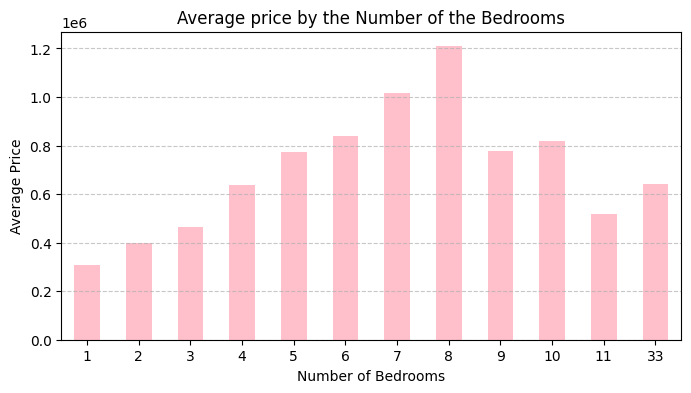

In [12]:
# Analyzing the price which varies with the number of bedrooms.

bedroom_price= data.groupby('number of bedrooms')['Price'].mean()
#print(bedroom_price)

#plotting
plt.figure(figsize=(8,4))
bedroom_price.plot(kind = 'bar', color='pink')
plt.title('Average price by the Number of the Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle= '--', alpha= 0.7)
plt.show()


#### What is the Age of the Houses?

In [13]:
# feature Engineer: new features from existing

data['Age of House']= 2024 - data['Built Year']
X = data.drop(['id','Date','Price'], axis=1)
print(data['Age of House'])

0        115
1         85
2         23
3         95
4         73
        ... 
14614     67
14615     56
14616     62
14617     69
14618     55
Name: Age of House, Length: 14619, dtype: int64


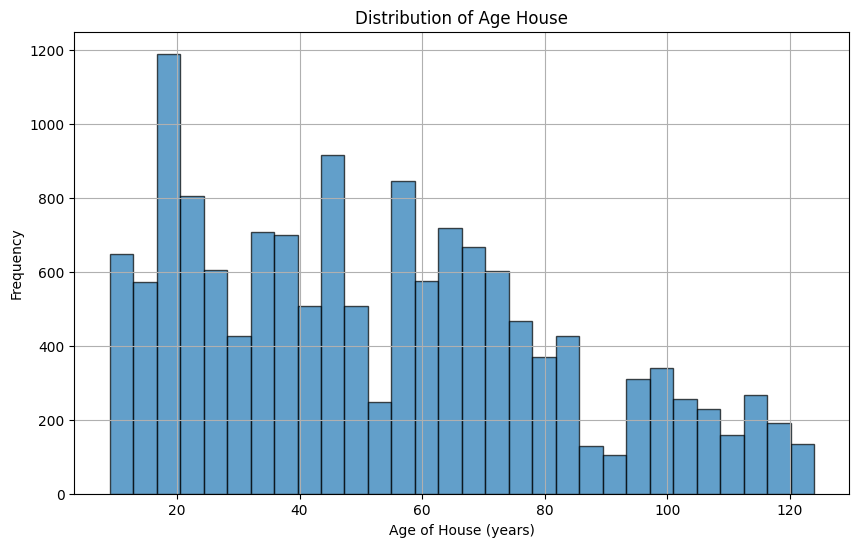

In [14]:
# vistualize the distribution of the 'Age of the house'

plt.figure(figsize=(10,6))
plt.hist(data['Age of House'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of Age House')
plt.xlabel('Age of House (years)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

#### What is the relationship between Total Area vs Price?

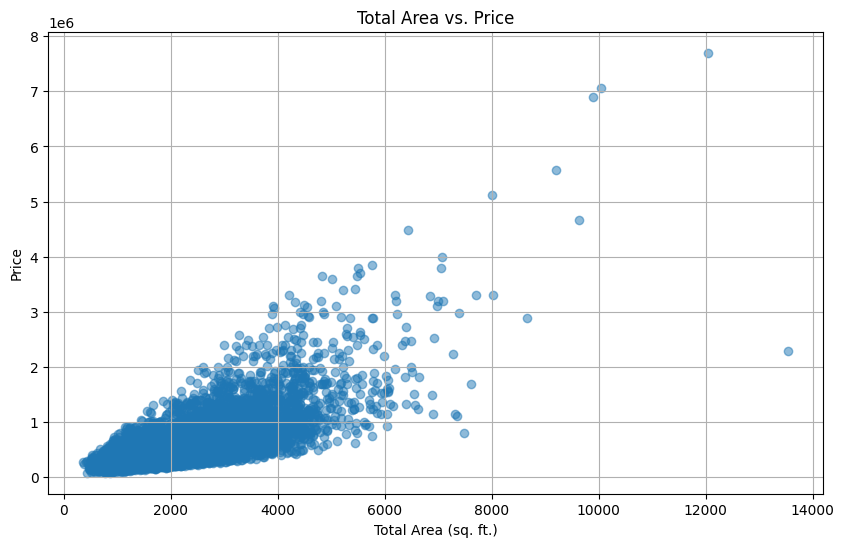

Correlation coefficient between Total Area and Price: 0.71


In [15]:
data['Total Area'] = data['Area of the house(excluding basement)'] + data['Area of the basement']

plt.figure(figsize=(10, 6))
plt.scatter(data['Total Area'], data['Price'], alpha=0.5)
plt.title('Total Area vs. Price')
plt.xlabel('Total Area (sq. ft.)')
plt.ylabel('Price')
plt.grid(True)
plt.show()

#correlation coefficient
correlation_coefficient = data['Total Area'].corr(data['Price'])
print(f'Correlation coefficient between Total Area and Price: {correlation_coefficient:.2f}')

Text(0.5, 1.0, 'Distribution of Housing Prices')

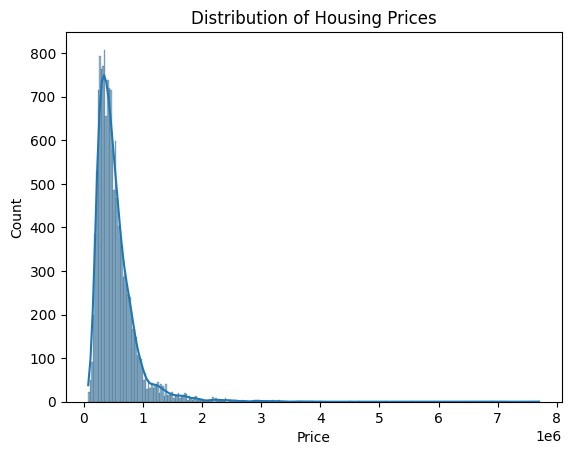

In [16]:
# Visulalize the distributation of the target variable
sns.histplot(data["Price"], kde= True)
plt.title("Distribution of Housing Prices")

In [17]:
# mean, median mode for numerical data

for i in numerical_features:
    mean = data[i]. mean().sum()
    median= data[i].median().sum()
    mode= data[i].mode()[0].sum()

    print(f"{i} =  Mean: {mean}, Median: {median} Mode: {mode}")


number of bedrooms =  Mean: 3.379232505643341, Median: 3.0 Mode: 3
number of bathrooms =  Mean: 2.1295574252684863, Median: 2.25 Mode: 2.5
living area =  Mean: 2098.156850673781, Median: 1930.0 Mode: 1400
lot area =  Mean: 15093.694507148231, Median: 7620.0 Mode: 5000
number of floors =  Mean: 1.5023257404747248, Median: 1.5 Mode: 1.0
number of views =  Mean: 0.23284766399890552, Median: 0.0 Mode: 0
Area of the house(excluding basement) =  Mean: 1801.6766536698817, Median: 1580.0 Mode: 1010
Area of the basement =  Mean: 296.48019700389904, Median: 0.0 Mode: 0
Built Year =  Mean: 1970.9298173609686, Median: 1975.0 Mode: 2014
Renovation Year =  Mean: 90.93022778575826, Median: 0.0 Mode: 0
Lattitude =  Mean: 52.79284267733771, Median: 52.8064 Mode: 52.7745
Longitude =  Mean: -114.40399630617688, Median: -114.421 Mode: -114.562
living_area_renov =  Mean: 1996.6418359668924, Median: 1850.0 Mode: 1440
lot_area_renov =  Mean: 12754.003078185922, Median: 7620.0 Mode: 5000
Number of schools nea

In [18]:
print('Min price: ', data['Price'].min())
print('Max price: ', data['Price'].max())
print('Mean price: ',data['Price'].mean())

Min price:  78000
Max price:  7700000
Mean price:  538806.2816882139


## Modeling

In [19]:
# PreProcessing for numerical data

#defining the target: to predict if the house price is above 1 crore
threshold = 1e6 # 1 million

# new column 'Price_Category'
data['Price_Category'] = np.where(data['Price']> threshold, 1, 0)

# features  (X) and Target variable (y)
X = data.drop(['Price', 'Price_Category', 'id', 'Date'], axis = 1)
y = data['Price_Category']

# ColumnTransformer to preprocess numerical and categorical features
preprocessor = ColumnTransformer(
    transformers =[
        ('num', StandardScaler() , numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

X_preprocessed = preprocessor.fit_transform(X)

#Displaying the shape of the preprocessed data and target variable for verification
print("Shape of X_preprocessed: ", X_preprocessed.shape)
print("Shape of y: " , y.shape)


Shape of X_preprocessed:  (14619, 103)
Shape of y:  (14619,)


In [20]:
#balance of the target variable
print(y.value_counts())

Price_Category
0    13641
1      978
Name: count, dtype: int64


 #### Train/Test Split

In [21]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

#20% of data used as the test set, while the remaining 80% is used for training.
#The dataset is split into training and testing sets using an 80-20 split, ensuring reproducibility with a random seed.
#Ensures the model is trained on one set of data and evaluated on another, unseen set.

In [22]:
# Build and train the train

#RandomForestClassifier: classifier using to train the model.
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

#Random forests create multiple decision trees using different random subsets of the training data and feature set.

RandomForestClassifier(random_state=42)

In [23]:
#evaluate the model
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")


Accuracy:  0.97


#### Confusion Matrix

Unique values in y_test: [0 1]
Unique values in y_pred: [0 1]
Confusion Matrix:
 [[2706   17]
 [  71  130]]
Shape of Confusion Matrix: (2, 2)


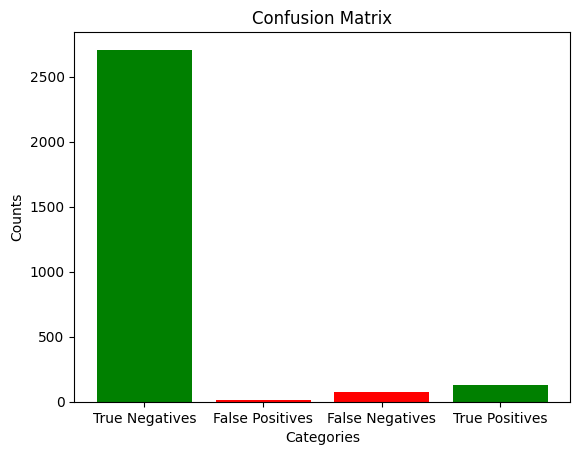


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2723
           1       0.88      0.65      0.75       201

    accuracy                           0.97      2924
   macro avg       0.93      0.82      0.87      2924
weighted avg       0.97      0.97      0.97      2924



In [24]:
# Print unique values in y_test and y_pred
unique_y_test = np.unique(y_test)
unique_y_pred = np.unique(y_pred)

print("Unique values in y_test:", unique_y_test)
print("Unique values in y_pred:", unique_y_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
print("Shape of Confusion Matrix:", cm.shape)

# Ensure the confusion matrix is (2, 2)
if cm.shape == (2, 2):
    # Plot the bar graph for the confusion matrix
    labels = ["True Negatives", "False Positives", "False Negatives", "True Positives"]
    cm_values = [cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]]

    plt.bar(labels, cm_values, color=['green', 'red', 'red', 'green'])
    plt.title('Confusion Matrix')
    plt.xlabel('Categories')
    plt.ylabel('Counts')
    plt.show()
else:
    print("The confusion matrix does not have the expected shape of (2, 2). This usually indicates that the model only predicted one class.")

# Print the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

In [25]:
# Saving the modified DataFrame to a new CSV file

data.to_csv('modified_housing_price.csv', index= False)

In [26]:
# downloading the new csv file

#from google.colab import files
#files.download('modified_housing_price.csv')

## Conclusion



1.) Key features influencing house prices include-:

 - living area
 - number of bedrooms
 - lot area
 - age of the house.
 - Total Area


2.) The feature 'Age of House' provided significant insights into the pricing trends."

3.)The new correlations features added -:
- Age of House
- Total Area
- Price_Category

4.) The scatter plot shows a positive relationship between Total Area and Price.
As the total area of a house increases, the price tends to increase as well. This is visually evident from the upward trend in the scatter plot.

5.) Confusion Matrix:

- True Negatives (TN): 2706 instances correctly predicted as not being above 6 million.

- False Positives (FP): 17 instances incorrectly predicted as being above 6 million

- False Negatives (FN): 71 instances incorrectly predicted as not being above 6 million.

- True Positives (TP): 130 instances correctly predicted as being above 6 million.

6.) The RandomForestClassifier model achieved high accuracy.

